In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
G1 = [0]
G2 = [0]
G3 = [0]

t = [0]

t_end = 1000

k1 = 2
k2 = 2
k3 = 2
gamma1 = 0.1
gamma2 = 0.1
gamma3 = 0.1
n = 9
c = 1

while t[-1] < t_end:
    current_G1 = G1[-1]
    current_G2 = G2[-1]
    current_G3 = G3[-1]

    rates = [(c**n)*k1/(c**n + current_G3**n), gamma1*current_G1, \
            (current_G1**n)*k2/(current_G1**n + c**n), gamma2*current_G2, \
            (current_G2**n)*k3/(current_G2**n + c**n), gamma3*current_G3]
    
    total_rate = sum(rates)

    tau = np.random.exponential(scale=1/total_rate)

    t.append(t[-1] + tau)

    rand_prob = random.uniform(0, 1)

    # G1 production
    if rand_prob < rates[0]/total_rate:
        G1.append(current_G1 + 1)
        G2.append(current_G2)
        G3.append(current_G3)

    # G1 degradation
    elif rand_prob < (rates[0] + rates[1])/total_rate:
        G1.append(current_G1 - 1)
        G2.append(current_G2)
        G3.append(current_G3)

    # G2 production
    elif rand_prob < (rates[0] + rates[1] + rates[2])/total_rate:
        G1.append(current_G1)
        G2.append(current_G2 + 1)
        G3.append(current_G3)

    # G2 degradation
    elif rand_prob < (rates[0] + rates[1] + rates[2] + rates[3])/total_rate:
        G1.append(current_G1)
        G2.append(current_G2 - 1)
        G3.append(current_G3)

    # G3 production
    elif rand_prob < (rates[0] + rates[1] + rates[2] + rates[3] + rates[4])/total_rate:
        G1.append(current_G1)
        G2.append(current_G2)
        G3.append(current_G3 + 1)

    # G3 degradation
    else:
        G1.append(current_G1)
        G2.append(current_G2)
        G3.append(current_G3 - 1)

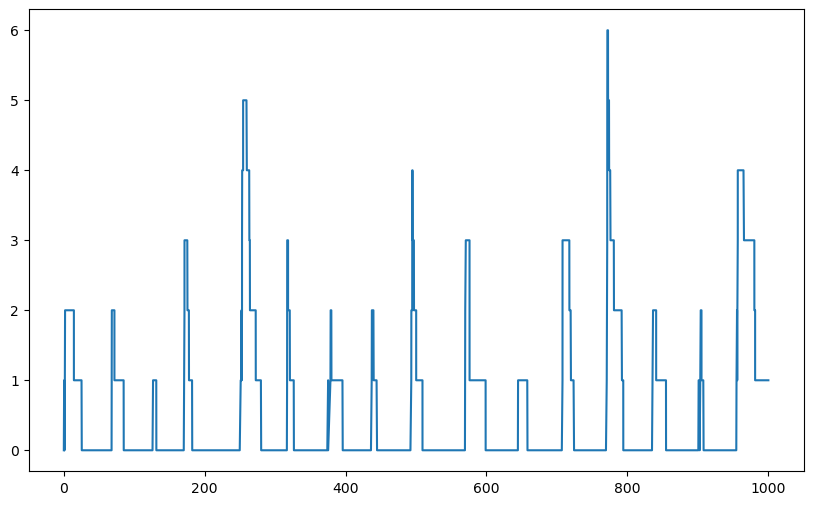

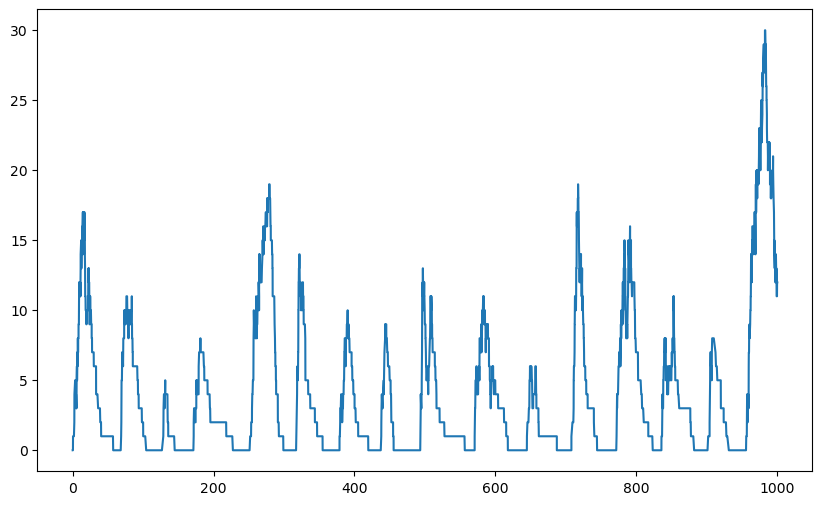

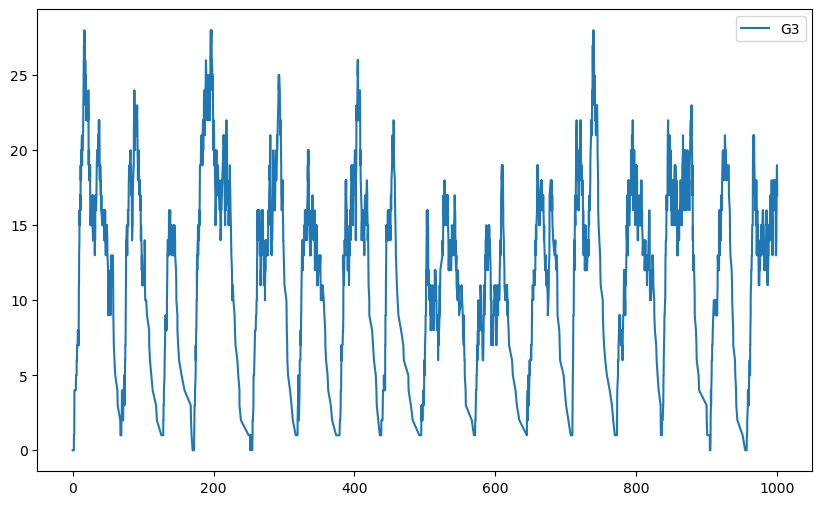

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(t, G1, label='G1')
plt.figure(figsize=(10, 6))

plt.plot(t, G2, label='G2')
plt.figure(figsize=(10, 6))

plt.plot(t, G3, label='G3')
plt.legend()

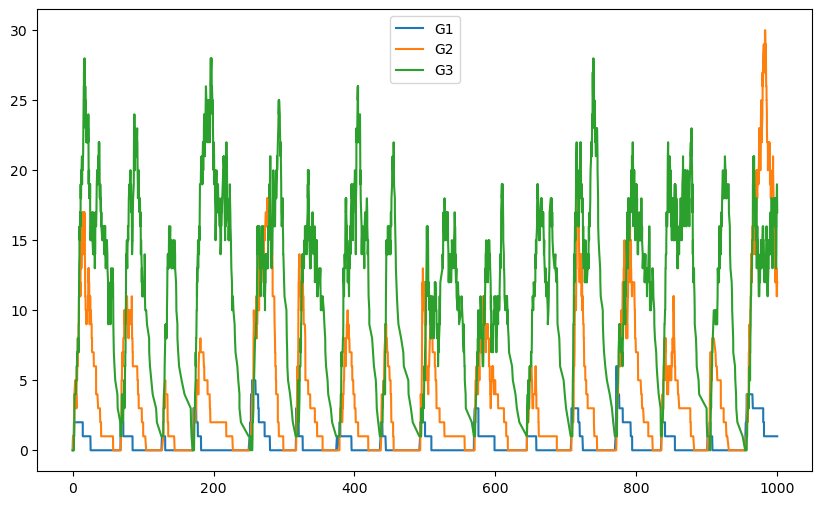

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t, G1, label='G1')
plt.plot(t, G2, label='G2')
plt.plot(t, G3, label='G3')
plt.legend()